In [148]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [149]:
# Load the iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head() # See the first 5 rows


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [150]:
features = data.iloc[:, [0, 1, 2, 3]].values

In [142]:
data.info()
data[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Exploratory Data Analysis

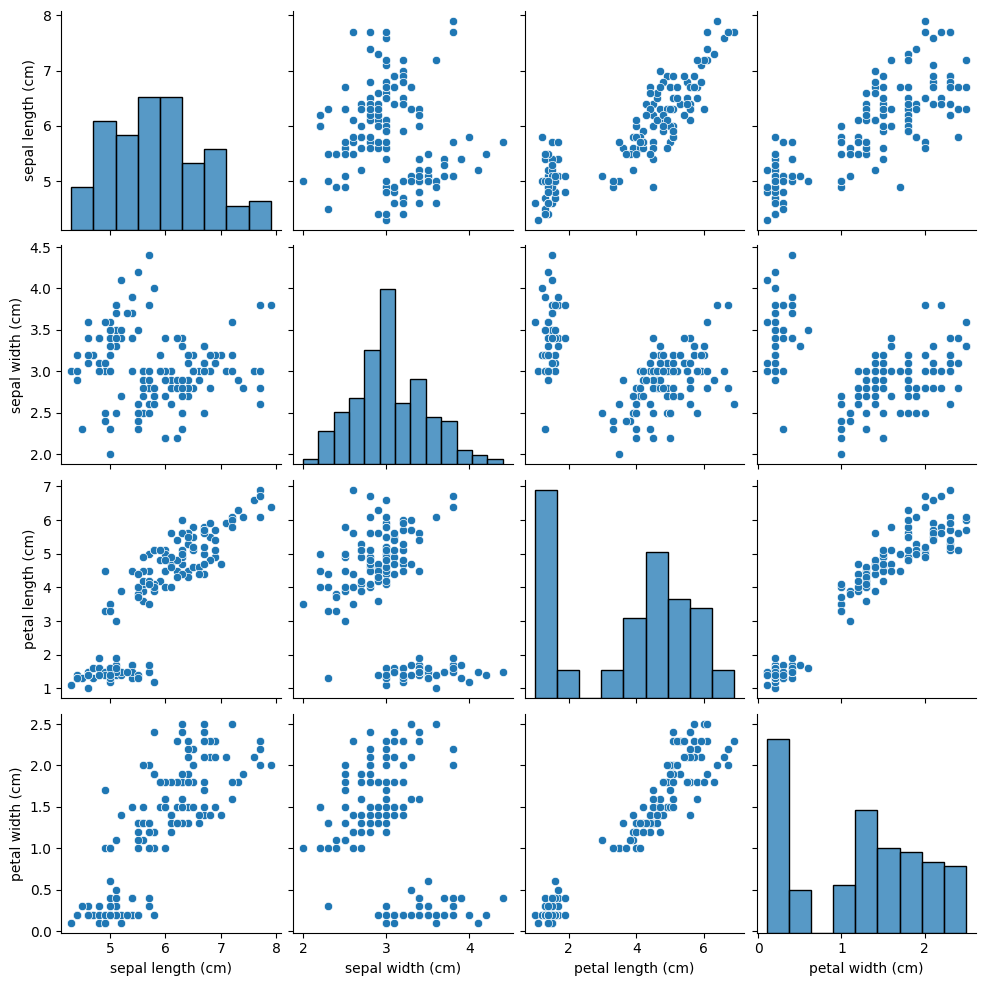

In [143]:
sns.pairplot(data)
plt.show()

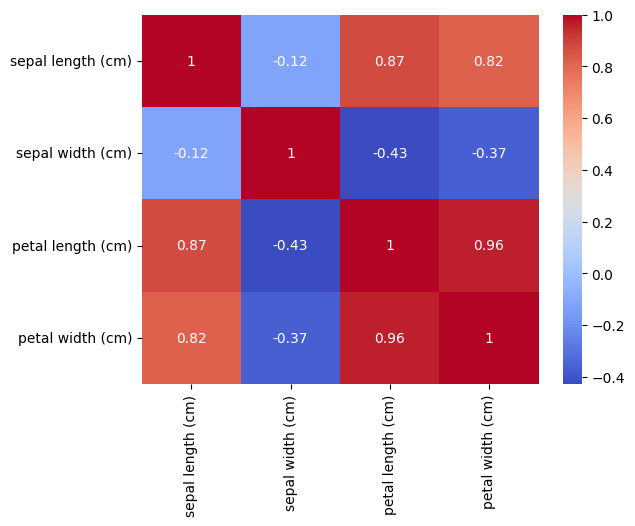

In [151]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


sepal width is negatively correlated with sepal length, petal length, petal width &
petal length is positively correlated with sepal length and petal width


In [144]:
# Determine optimal number of clusters using Elbow Method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

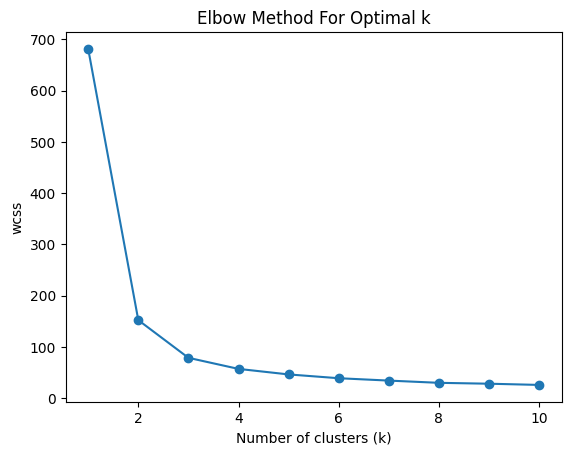

In [114]:
# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('wcss') 
plt.show()

optimal number of clusters are 3, so lets use this in model 

In [125]:
# Fit KMeans with the optimal number of clusters ( k=3 from the elbow graph)
kmeans = KMeans(n_clusters =3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
cluster_labels = kmeans.fit_predict(features)

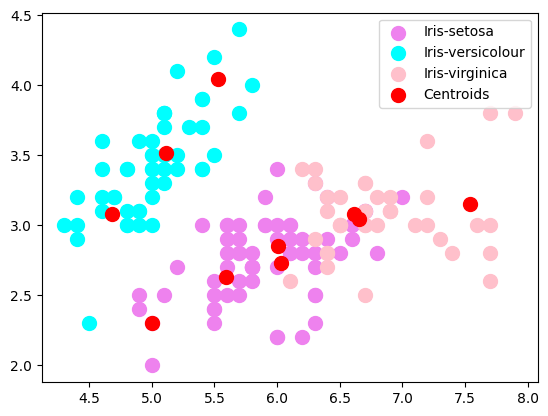

In [155]:
#Visualising the clusters
plt.scatter(features[cluster_labels == 0, 0], features[cluster_labels == 0, 1], s = 100, c = 'violet', label = 'Iris-setosa')
plt.scatter(features[cluster_labels == 1, 0], features[cluster_labels == 1, 1], s = 100, c = 'cyan', label = 'Iris-versicolour')
plt.scatter(features[cluster_labels == 2, 0], features[cluster_labels == 2, 1], s = 100, c = 'pink', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

Iris-versicolour cluster is distinctly separated from the others, indicating that this species has different characteristics compared to iris-virginica and iris-sentosa. Overlapping of iris-virginica and iris-sentosa clusters suggest that they share some similarities in their features compared to iris-versicolor